<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DLThon/jellyfish_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 업로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image

In [ ]:
# 데이터셋 경로 설정
base_dir = '/content/drive/MyDrive/aiffel/Jellyfish/Train_Test_Valid'

# 하위 폴더 이름
sub_dirs = ['Train', 'test', 'valid']

# 해파리 종류 및 레이블 매핑
jellyfish_types = {
    'Moon_jellyfish': 0,
    'barrel_jellyfish': 1,
    'blue_jellyfish': 2,
    'compass_jellyfish': 3,
    'lions_mane_jellyfish': 4,
    'mauve_stinger_jellyfish': 5
}

train_dir = base_dir + '/Train'
test_dir = base_dir + '/Test'
valid_dir = base_dir + '/Valid'

Moon_jellyfish
barrel_jellyfish
blue_jellyfish
compass_jellyfish
lions_mane_jellyfish
mauve_stinger_jellyfish

이렇게 6개 폴더가 더 있다.

In [ ]:
import pandas as pd

# 각 폴더의 이미지 수를 저장할 데이터프레임 생성
df = pd.DataFrame(columns=jellyfish_types, index=sub_dirs)

# 각 폴더와 해파리 종류별로 이미지 수 계산
for sub_dir in sub_dirs:
    for jellyfish_type in jellyfish_types:
        path = os.path.join(base_dir, sub_dir, jellyfish_type)
        image_count = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
        df.at[sub_dir, jellyfish_type] = image_count

# 데이터프레임 출력
print(df)

      Moon_jellyfish barrel_jellyfish blue_jellyfish compass_jellyfish  \
Train            150              150            150               150   
test               6                5              7                 7   
valid              6                5              7                 7   

      lions_mane_jellyfish mauve_stinger_jellyfish  
Train                  150                     150  
test                     8                       7  
valid                    7                       7  


In [ ]:
# 이미지 사이즈를 저장할 리스트
size_counts = {}

# # 각 이미지 파일에 대한 사이즈 검사
# for sub_dir in sub_dirs:
#     for jellyfish_type in jellyfish_types:
#         folder_path = os.path.join(base_dir, sub_dir, jellyfish_type)
#         for image_file in os.listdir(folder_path):
#             if image_file.endswith('.jpg'):
#                 image_path = os.path.join(folder_path, image_file)
#                 with Image.open(image_path) as img:
#                     image_sizes.append(img.size)

# 모든 이미지를 224x224 사이즈로 리사이징
# for sub_dir in sub_dirs:
#     for jellyfish_type in jellyfish_types:
#         folder_path = os.path.join(base_dir, sub_dir, jellyfish_type)
#         for image_file in os.listdir(folder_path):
#             if image_file.endswith('.jpg'):
#                 image_path = os.path.join(folder_path, image_file)
#                 with Image.open(image_path) as img:
#                     # 이미지 리사이징
#                     img_resized = img.resize((224, 224), Image.ANTIALIAS)
#                     # 원본 이미지를 리사이즈된 이미지로 덮어쓰기
#                     img_resized.save(image_path)

# 각 이미지 파일에 대한 사이즈 검사
for sub_dir in sub_dirs:
    for jellyfish_type in jellyfish_types:
        folder_path = os.path.join(base_dir, sub_dir, jellyfish_type)
        for image_file in os.listdir(folder_path):
            if image_file.endswith('.jpg'):
                image_path = os.path.join(folder_path, image_file)
                with Image.open(image_path) as img:
                    size = img.size
                    size_counts[size] = size_counts.get(size, 0) + 1

# 이미지 사이즈와 그 등장 횟수 출력
for size, count in size_counts.items():
    print(f"Size: {size}, Count: {count}")

Size: (224, 224), Count: 924


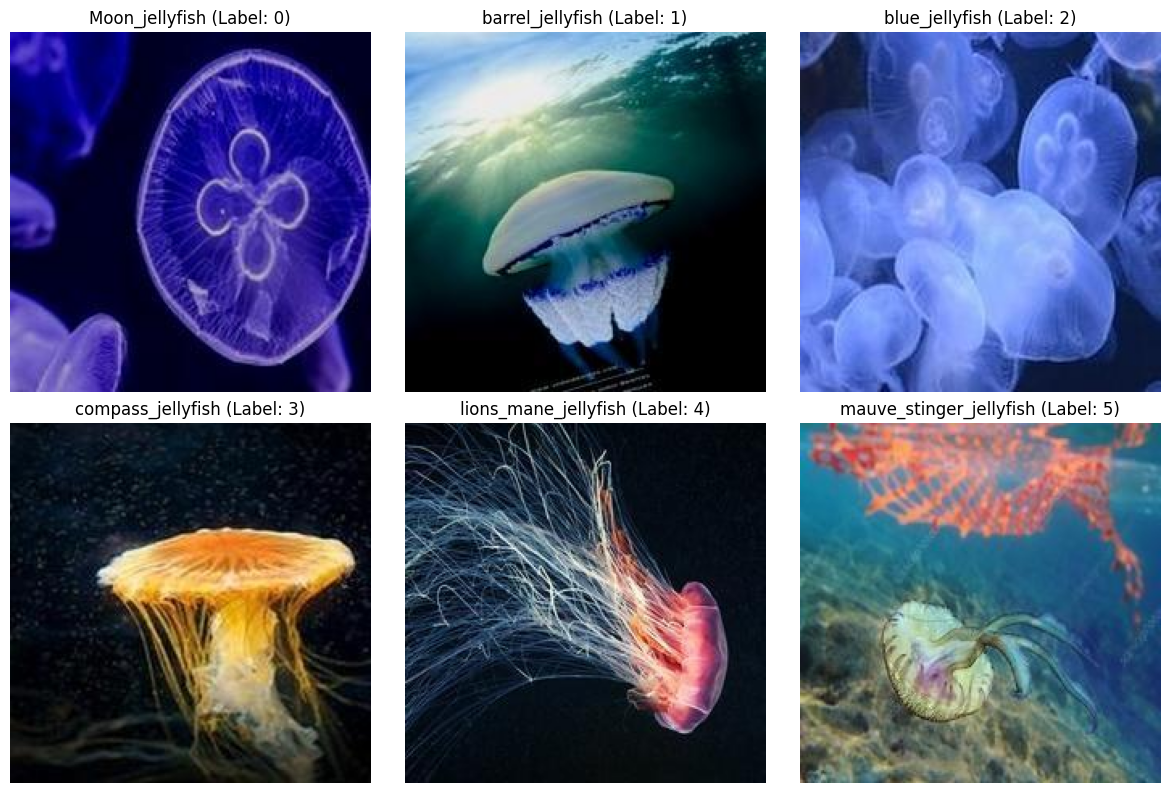

In [ ]:
# 이미지 시각화
plt.figure(figsize=(12, 8))

for i, (jellyfish_type, label) in enumerate(jellyfish_types.items()):
    # 각 폴더의 101번째 이미지 선택 (이미지 존재 여부 확인 필요)
    jellyfish_folder = os.path.join(train_dir, jellyfish_type)
    image_files = os.listdir(jellyfish_folder)
    if len(image_files) > 101:
        image_file = image_files[101]
        image_path = os.path.join(jellyfish_folder, image_file)

        # 이미지 로드 및 표시
        img = Image.open(image_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f'{jellyfish_type} (Label: {label})')
        plt.axis('off')
    else:
        print(f"Not enough images in {jellyfish_type} folder.")

plt.tight_layout()
plt.show()

- Moon jellyfish (Aurelia aurita): 반투명한 몸통(exumbrella) 넘어로 4개의 말발굽 모양의 생식선이 보이는 일반적인 해파리입니다. 촉수로 메두사, 플랑크톤, 연체동물을 모아서 잡아먹습니다.
- Barrel jellyfish (Rhizostoma pulmo): 영국 해역에서 발견되는 가장 큰 해파리로 지름이 90cm까지 자랄 수 있습니다. 촉수로 플랑크톤과 작은 물고기를 잡아서 먹습니다.
- Blue jellyfish (Cyanea lamarckii): 지름이 30cm까지 자랄 수 있는 큰 해파리입니다. 촉수로 플랑크톤과 작은 물고기를 잡아먹습니다.
- Compass jellyfish (Chrysaora hysoscella): 몸통의 갈색 모양이 나침반을 닮아 이름지어졌습니다. 촉수로 플랑크톤이나 작은 물고기를 잡아먹습니다.
- Lion’s mane jellyfish (Cyanea capillata): 세계에서 가장 큰 해파리로, 몸통은 2미터까지 자라며 촉수는 30미터에 다다릅니다. 촉수로 플랑크톤과 작은 물고기를 잡아먹습니다.
- Mauve stinger (Pelagia noctiluca): 긴 촉수를 가졌으며 몸통에 독을 쏘는 세포로 가득찬 혹 같은 구조물을 가진 작은 해파리입니다. 작은 해파리나 멍게를 잡아먹습니다.

## 2. 모델 설계하기


ResNet50으로 Transfer Learning 진행

In [ ]:
import tensorflow as tf

IMG_SIZE = 224

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                            include_top=False,
                                            weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 특정 레이어 이후의 모든 레이어를 학습 가능하게 설정
fine_tune_at = 150  # 마지막 100개의 레이어를 학습 가능하게 설정
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.layers import BatchNormalization

# 새로운 분류기 추가
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Dropout 층 추가
    Dense(6, activation='softmax')  # 해파리 클래스가 6개라고 가정
])

In [ ]:
# # 모델 컴파일
# model.compile(optimizer=tf.keras.optimizers.Adam(),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# 모델 재컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 데이터 전처리 및 배치 생성
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    classes=list(jellyfish_types.keys()))  # 클래스 이름을 명시적으로 지정

Found 900 images belonging to 6 classes.


In [ ]:
# 이미지 크기 및 검증 데이터셋 경로 설정
IMG_SIZE = 224
valid_dir = '/content/drive/MyDrive/aiffel/Jellyfish/Train_Test_Valid/valid'

# 검증 데이터셋 준비
valid_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    classes=list(jellyfish_types.keys()))


Found 39 images belonging to 6 classes.


In [ ]:
# 모델 훈련 및 검증 데이터셋 사용
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator)  # 검증 데이터셋 추가

Epoch 1/50
29/29 [==============================] - 26s 256ms/step - loss: 2.1481 - accuracy: 0.2556 - val_loss: 2.0236 - val_accuracy: 0.1282
Epoch 2/50
29/29 [==============================] - 5s 161ms/step - loss: 1.5281 - accuracy: 0.4367 - val_loss: 1.9568 - val_accuracy: 0.1282
Epoch 3/50
29/29 [==============================] - 4s 134ms/step - loss: 1.2068 - accuracy: 0.5611 - val_loss: 1.8899 - val_accuracy: 0.1282
Epoch 4/50
29/29 [==============================] - 4s 133ms/step - loss: 1.0231 - accuracy: 0.6444 - val_loss: 1.8414 - val_accuracy: 0.1282
Epoch 5/50
29/29 [==============================] - 5s 161ms/step - loss: 0.8464 - accuracy: 0.6944 - val_loss: 1.8245 - val_accuracy: 0.1795
Epoch 6/50
29/29 [==============================] - 4s 144ms/step - loss: 0.7979 - accuracy: 0.6989 - val_loss: 1.8067 - val_accuracy: 0.1538
Epoch 7/50
29/29 [==============================] - 4s 135ms/step - loss: 0.6642 - accuracy: 0.7567 - val_loss: 1.7936 - val_accuracy: 0.2564
Epoch

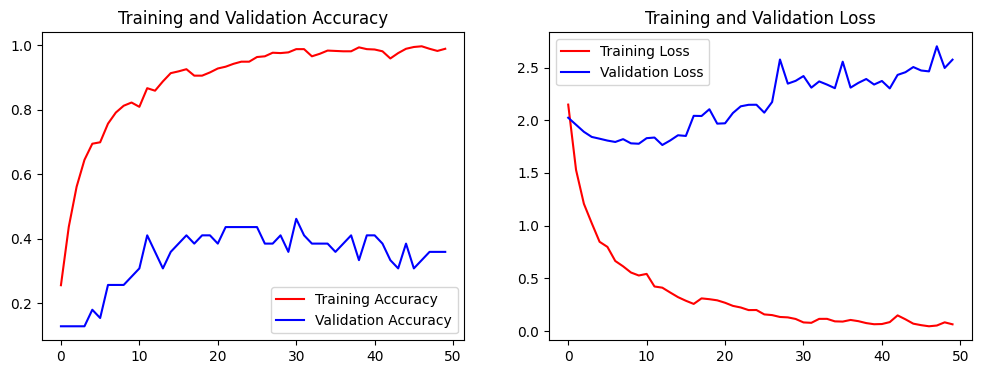

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 과정의 정확도와 손실 추출
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# 정확도 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
